WARNING: Run cell by cell, not all at once. Very taxing notebook.
1) Import Libraries
2) Import Data
3) Charts and Stuff
    - Charts on Prices ranges
    - Charts on Product types i.e. departments
    - Charts on loyalty
    - Charts on region
    - Charts on Customer profile
    - Sampling
    - More charts (line, scatter, pie) on subjects above

# 01 Import Libraries

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 Import Data

In [2]:
path = r'C:\Users\benar\CareerFoundry\09-2023 Instacart Basket Analysis'

In [3]:
ords_prods_all = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'orders_products_all_project.pkl'))

In [5]:
ords_prods_all.head()

,user_id,gender,state,age,n_dependants,fam_status,income,product_id,product_name,aisle_id,...,busiest_period_of_day,max_order,loyalty_flag,mean_spend,spender_flag,median_order_frequency,order_frequency_flag,region,exclusion_flag,customer_profile_flag
0,26711,Female,Missouri,48,3,married,165665,196,Soda,77,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,Include,Mature family
1,26711,Female,Missouri,48,3,married,165665,196,Soda,77,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,Include,Mature family
2,26711,Female,Missouri,48,3,married,165665,196,Soda,77,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,Include,Mature family
3,26711,Female,Missouri,48,3,married,165665,6184,Clementines,32,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,Include,Mature family
4,26711,Female,Missouri,48,3,married,165665,6184,Clementines,32,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,Include,Mature family


In [6]:
ords_prods_all.shape

(30964564, 32)

In [9]:
ords_prods_all.columns

Index(['user_id', 'gender', 'state', 'age', 'n_dependants', 'fam_status',
       'income', 'product_id', 'product_name', 'aisle_id', 'department_id',
       'prices', 'order_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_spend',
       'spender_flag', 'median_order_frequency', 'order_frequency_flag',
       'region', 'exclusion_flag', 'customer_profile_flag'],
      dtype='object')

# 03 Charts and Stuff for Project

In [ ]:
# Checking distribution of price ranges in orders
bar1 = ords_prods_all['price_range_loc'].value_counts().plot.bar()
plt.ylabel('orders(in ten millions)')

In [16]:
# Export chart
bar1.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_price_range_orders.png'), bbox_inches='tight')

In [ ]:
# Looking at distribution of price ranges between products.
bar20 = ords_prods_all.groupby('price_range_loc')['product_name'].nunique().plot.bar()
plt.ylabel('products')
bar20.invert_xaxis()

In [18]:
# Export chart
bar20.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_price_range_unique.png'), bbox_inches='tight')

In [8]:
ords_prods_all['price_range_loc'].value_counts(dropna = False)

price_range_loc
Mid-range product     20891771
Low-range product      9674840
High-range product      397953
Name: count, dtype: int64

In [ ]:
# Creating bar chart to find product types with most orders.
bar2 = ords_prods_all['department_id'].value_counts().plot.bar()
plt.ylabel('orders(in millions)')

In [ ]:
# Export chart
bar2.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_department_id.png'), bbox_inches='tight')

In [4]:
ords_prods_all['department_id'].value_counts(dropna = False)

department_id
4     9079273
16    5177182
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
17     699857
12     674781
14     670850
11     424306
18     410392
6      255991
5      144627
8       93060
21      64768
2       34411
10      33451
Name: count, dtype: int64

In [7]:
# Creating loop to make list with all department names that coorespond with the department_id
result = []
department_name = ["frozen", "other", "bakery", "produce", "alcohol", "international", "beverages", "pets", "dry goods pasta", "bulk", "personal care", "meat seafood", "pantry", "breakfast", "canned goods", "dairy eggs", "household", "babies", "snacks", "deli", "missing"]

for value in ords_prods_all['department_id']:
    result.append(department_name[value - 1])

In [8]:
# Creating new department_name column using the result list
ords_prods_all['department_name'] = result

In [9]:
ords_prods_all['department_name'].value_counts(dropna = False)

department_name
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

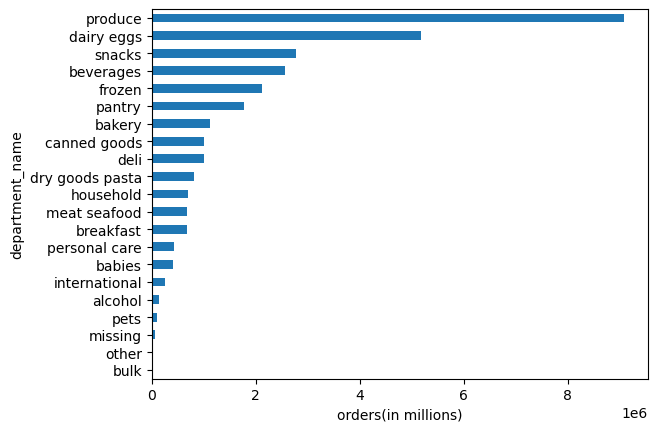

In [24]:
# Creating new graph that has better readability than the other one above.
bar12 = ords_prods_all['department_name'].value_counts().plot.barh()
plt.xlabel('orders(in millions)')
bar12.invert_yaxis()

In [22]:
# Export chart
bar12.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_department_name.png'), bbox_inches='tight')

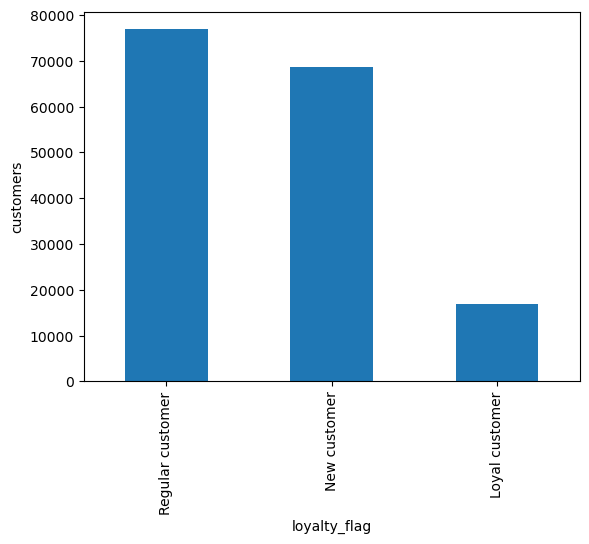

In [5]:
# Distribution of loyalty flag in unique customers
bar3 = ords_prods_all.groupby('loyalty_flag')['user_id'].nunique().plot.bar()
plt.ylabel('customers')
bar3.invert_xaxis()

In [ ]:
# Export chart
bar3.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_loyalty_flag_distribution.png'), bbox_inches='tight')

In [17]:
ords_prods_all.groupby('loyalty_flag')['user_id'].nunique()

loyalty_flag
Loyal customer      17017
New customer        68750
Regular customer    76864
Name: user_id, dtype: int64

In [6]:
ords_prods_all['user_id'].nunique()

162631

In [7]:
# Checking the value counts make sense.
76864 + 68750 + 17017

162631

In [ ]:
pie4 = ords_prods_all.groupby('loyalty_flag')['user_id'].nunique().plot.pie(autopct = '%1.0f%%')
plt.ylabel('')
plt.xlabel('customers')

In [12]:
# Export chart
pie4.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'pie_loyalty_flag_distribution.png'))

In [ ]:
pie5 = ords_prods_all['loyalty_flag'].value_counts().plot.pie(autopct = '%1.0f%%')
plt.ylabel('')
plt.xlabel('orders')

In [11]:
# Export chart
pie5.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'pie_loyalty_flag_orders.png'))

In [ ]:
# Charting orders by region
bar4 = ords_prods_all['region'].value_counts().plot.bar()
plt.ylabel('orders(in ten millions)')

In [31]:
# Exporting chart
bar4.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_region_orders.png'), bbox_inches='tight')

In [ ]:
# Charting distribution of region between unique customers.
bar5 = ords_prods_all.groupby('region')['user_id'].nunique().plot.bar()
plt.ylabel('customers')

In [33]:
# Exporting chart
bar5.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_region_customers.png'), bbox_inches='tight')

In [ ]:
# Creating chart of customer_profile_flag grouped by user_id, so this is every unique customer profile for every customer.
bar6 = ords_prods_all.groupby('customer_profile_flag')['user_id'].nunique().plot.bar()
plt.ylabel('customers')

In [6]:
# Exporting chart
bar6.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_customer_flag_unique.png'), bbox_inches='tight')

In [ ]:
# Creating pie chart of above chart.
pie6 = ords_prods_all.groupby('customer_profile_flag')['user_id'].nunique().plot.pie(autopct = '%1.0f%%')
plt.ylabel('')
plt.xlabel('customers')

In [11]:
# Exporting chart
pie6.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'pie_customer_flag_unique.png'))

In [ ]:
# Creating bar chart of customer_profile_flag
bar7 = ords_prods_all['customer_profile_flag'].value_counts().plot.bar()
plt.ylabel('orders(in ten millions)')

In [12]:
# Exporting chart
bar7.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_customer_flag_orders.png'), bbox_inches='tight')

#### Sampling

In [4]:
#Setting seed to 4 and creating list holding True/False values to np.random.rand() function <= 0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_all)) <= 0.7

In [5]:
#Store 70% of the sample in "big" dataframe
big = ords_prods_all[dev]

In [6]:
#Store 30% of the sample in "small" dataframe
small = ords_prods_all[~dev]

In [7]:
len(ords_prods_all)

30964564

In [8]:
len(big) + len(small)

30964564

#### Sampling End

In [14]:
df_1 = small[['prices' , 'age']]

In [15]:
df_1.head()

,prices,age
0,9.0,48
2,9.0,48
3,4.3,48
6,4.3,48
10,4.0,48


In [ ]:
# Seeing how prices change as age changes.
line1 = sns.lineplot(data = df_1, x = 'age', y = 'prices')

In [18]:
# Export chart
line1.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_age_prices.png'))

In [ ]:
# Create line chart of order dow vs prices filtered by customer_profile_flag
line2 = sns.lineplot(data = small, x = 'orders_day_of_week', y = 'prices', hue = 'customer_profile_flag')

In [20]:
# Export chart
line2.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_orders_dow_prices_customer.png'))

In [ ]:
# Create line chart of order hod vs prices filtered by customer_profile_flag 
line3 = sns.lineplot(data = small, x = 'order_hour_of_day', y = 'prices', hue = 'customer_profile_flag')

In [22]:
# Export chart
line3.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_orders_hod_prices_customer.png'))

In [ ]:
# Create line chart of order hod vs prices filtered by region
line4 = sns.lineplot(data = small, x = 'order_hour_of_day', y = 'prices', hue = 'region')

In [24]:
# Export chart
line4.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_orders_hod_prices_region.png'))

In [ ]:
# Create line chart of order dow vs prices filtered by region
line5 = sns.lineplot(data = small, x = 'orders_day_of_week', y = 'prices', hue = 'region')

In [26]:
# Export chart
line5.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_orders_dow_prices_region.png'))

In [ ]:
# Create line chart of order dow vs prices filtered by loyalty
line6 = sns.lineplot(data = small, x = 'orders_day_of_week', y = 'prices', hue = 'loyalty_flag')

In [28]:
# Export chart
line6.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_orders_dow_prices_loyalty.png'))

In [ ]:
# Create line chart of order hod vs prices filtered by loyalty
line7 = sns.lineplot(data = small, x = 'order_hour_of_day', y = 'prices', hue = 'loyalty_flag')

In [30]:
# Export chart
line7.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_orders_hod_prices_loyalty.png'))

In [ ]:
pie1 = ords_prods_all['orders_day_of_week'].value_counts().plot.pie(autopct = '%1.0f%%')

In [14]:
# Export chart
pie1.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'pie_orders_dow.png'))

In [ ]:
pie2 = ords_prods_all['department_name'].value_counts().nlargest(10).plot.pie(autopct = '%1.0f%%')
plt.ylabel('')
plt.xlabel('amount of orders')

In [15]:
# Export chart
pie2.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'pie_departments_top_10.png'))

In [ ]:
pie3 = ords_prods_all['order_hour_of_day'].value_counts().nlargest(12).plot.pie(autopct = '%1.0f%%')

In [6]:
# Export chart
pie3.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'pie_order_hod.png'))

In [16]:
#Exporting final dataframe
ords_prods_all.to_pickle(os.path.join(path, 'Data','Prepared Data', 'ords_prods_all_final.pkl'))